In [2]:
import tensorflow as tf
import numpy as np
import time
import os
import sys
import pandas
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
#必要的库和库的版本检查#
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pandas,sklearn,tf,keras:
    print(module.__name__, )

2.1.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib
numpy
pandas
sklearn
tensorflow
tensorflow_core.python.keras.api._v2.keras


In [3]:
#取数据集#
fashion_mnist=keras.datasets.fashion_mnist
(x_all,y_all),(x_test,y_test)=fashion_mnist.load_data()
x_val,x_train=x_all[:5000],x_all[5000:]
y_val,y_train=y_all[:5000],y_all[5000:]

print(x_val.shape,y_val.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
#核心代码，利用keras框架搭建全连接神经网络与回调函数#
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(150,activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(75,activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(37,activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(18,activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
print("ok")

ok


In [5]:
#归一化#
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_val_scaled=scaler.fit_transform(x_val.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
print("ok")

ok


In [11]:
logdir=os.path.join("keras")
if not os.path.exists(logdir):
    os.mkdir(logdir)
outputs=os.path.join(logdir,"fashion_mnist_model.h5")
callbacks=[keras.callbacks.TensorBoard(logdir),
           keras.callbacks.ModelCheckpoint(outputs,save_best_only=True),
           keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [12]:
#训练30次#
def train(model):
    history=model.fit(x_train_scaled,y_train,epochs=14,validation_data=(x_val_scaled,y_val),callbacks=callbacks)
    return history
historys=train(model)

Train on 55000 samples, validate on 5000 samples
Epoch 1/14
55000/55000 [==============================] - 19s 349us/sample - loss: 1.1375 - accuracy: 0.6097 - val_loss: 0.5600 - val_accuracy: 0.8062
Epoch 2/14
55000/55000 [==============================] - 13s 232us/sample - loss: 0.7767 - accuracy: 0.7289 - val_loss: 0.5041 - val_accuracy: 0.8320
Epoch 3/14
55000/55000 [==============================] - 13s 237us/sample - loss: 0.6881 - accuracy: 0.7632 - val_loss: 0.4775 - val_accuracy: 0.8418
Epoch 4/14
55000/55000 [==============================] - 13s 236us/sample - loss: 0.6371 - accuracy: 0.7801 - val_loss: 0.4616 - val_accuracy: 0.8510
Epoch 5/14
55000/55000 [==============================] - 13s 242us/sample - loss: 0.6058 - accuracy: 0.7934 - val_loss: 0.4584 - val_accuracy: 0.8532
Epoch 6/14
55000/55000 [==============================] - 13s 237us/sample - loss: 0.5908 - accuracy: 0.8003 - val_loss: 0.4476 - val_accuracy: 0.8584
Epoch 7/14
55000/55000 [=====================

In [7]:
#测试#
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.4595 - accuracy: 0.8571


[0.45948176559209825, 0.8571]

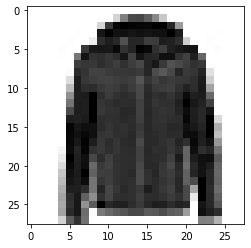

In [10]:
def showSingleImage(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
showSingleImage(x_train[0])

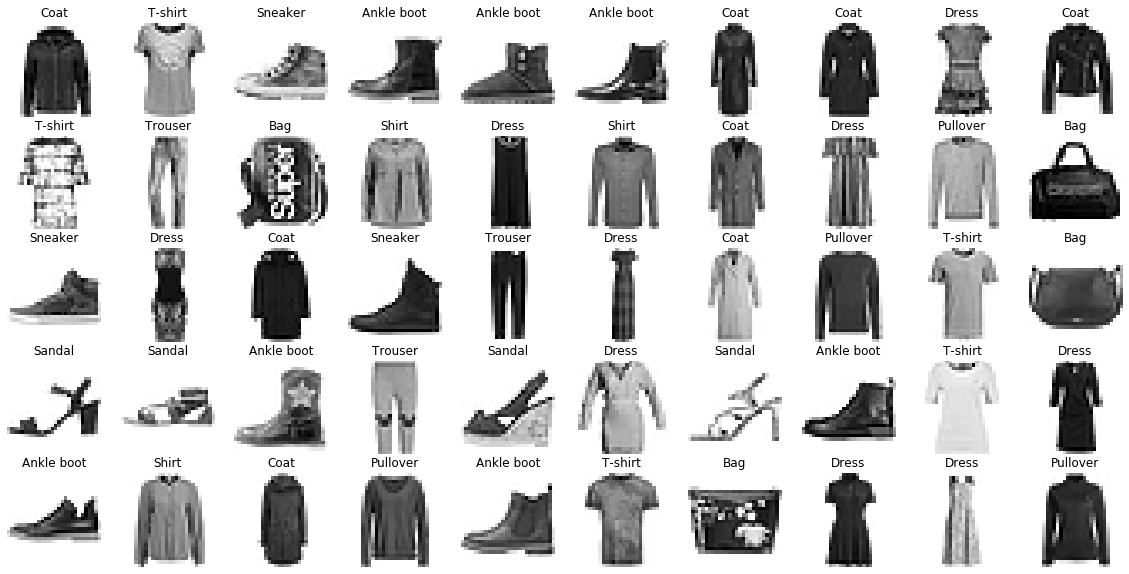

In [13]:
def showImgs(rows,cols,xdata,ydata,classname):
    assert len(xdata)==len(ydata)
    assert rows*cols<=len(xdata)
    plt.figure(figsize=(cols*2.0,rows*2.0))
    for row in range(rows):
        for col in range(cols):
            index=cols*row+col
            plt.subplot(rows,cols,index+1)
            plt.imshow(xdata[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(classname[ydata[index]])
    plt.show()
classname=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
showImgs(5,10,x_train,y_train,classname)

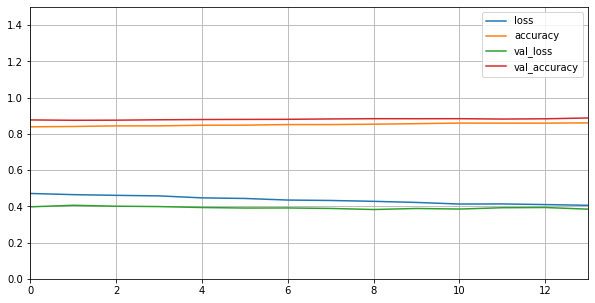

In [12]:
def showDnCurve(history):
    pandas.DataFrame(history.history).plot(figsize=(10,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.5)
    plt.show()
showDnCurve(historys)